In [47]:
# until the github pip foolbox is updated
import sys
sys.path.insert(0,'/media/rene/code/foolbox')
import foolbox

In [49]:
import os
import sys
import pickle
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from IPython.display import display, HTML
%reload_ext autoreload
%autoreload 2
%matplotlib inline

# Nicer way to import the module?
sys.path.append(str(Path.cwd().parent))

from models.cifar import resnet
from utils.display import load_image, show_img
from utils.loading import load_net_cifar

import torch
from torch import nn
from torch.autograd import Variable
from torch.autograd.gradcheck import zero_gradients
import torchvision.transforms as T
from torchvision.models import resnet18, vgg16
import foolbox
import json
from PIL import Image

device = torch.device("cuda:1" if torch.cuda.is_available() else "cpu")
print(torch.cuda.device_count())
print(torch.cuda.current_device())

2
0


# Check Adversarial Dataset
* Images from FGSM look resonable
* For some reason about 1% of the images didn't work and are missing

In [50]:
with open('/media/rene/data/adv_denoising/cifar10/adv_fgsm/resnet50/sample/files_df_adv.pkl', 'rb') as f:
    files_df = pickle.load(f)
    
model_loc = '/media/rene/data/adv_denoising/cifar10/cifar10_normal/models/resnet-50_model_best.pth.tar'
classifier_model = load_net_cifar(model_loc).eval()

Loading model_file resnet-50


label 7
predicted class 7
adversarial class 5


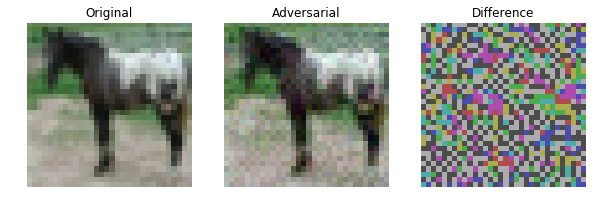

In [57]:
mean = np.array([0.485, 0.456, 0.406]).reshape((3, 1, 1))
std = np.array([0.2023, 0.1994, 0.2010]).reshape((3, 1, 1))

idx = np.random.randint(0, len(files_df['train']))

img_path = files_df['train']['path'].iloc[idx]
adv_path = files_df['train']['adv_path'].iloc[idx]
label = files_df['train']['class'].iloc[idx]

image = load_image(img_path)
adversarial = load_image(adv_path)

fmodel = foolbox.models.PyTorchModel(
    classifier_model, bounds=(0, 1), num_classes=10, preprocessing=(mean, std))

print('label', label)
print('predicted class', np.argmax(fmodel.predictions(image)))
print('adversarial class', np.argmax(fmodel.predictions(adversarial)))

show_img(image, adversarial)

What if we have layers where at each location only one feature can be active. Then do some kind of beam search over this to the the overall activations, just like in NLP